In [1]:
# Importing all required libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
import sklearn

In [3]:
#Importing visa application dataset as dataset using pandas, We will use this as training dataset
dataset = pd.read_csv('v_applications.csv')

In [4]:
#Exploring dataset
dataset.head(400)

,Applicant_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,University Rank,Visa_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,Y
...,...,...,...,...,...,...,...,...,...,...
395,LP002272,Male,Yes,2,Graduate,No,3276.0,484.0,135.0,Y
396,LP002277,Female,No,0,Graduate,No,3180.0,0.0,71.0,N
397,LP002281,Male,Yes,0,Graduate,No,3033.0,1459.0,95.0,Y
398,LP002284,Male,No,0,Not Graduate,No,3902.0,1666.0,109.0,Y


In [5]:
# Modifying the University Ranking column with integers, 
# For that we will generate random numbers which is similar to row count and replacing that numbers to existing column values
# Gerating 614 random integers between 1 and 614 (inclusive)
random_numbers = [random.randint(1, 614) for _ in range(dataset.shape[0])]

# Inserting random integers as a new column 'University Rank'
dataset['University Rank'] = random_numbers

# Displaying the updated DataFrame
dataset

,Applicant_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,University Rank,Visa_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,521,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,416,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,322,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,293,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,602,Y
...,...,...,...,...,...,...,...,...,...,...
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512,NaN
610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119,NaN
611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204,NaN
612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437,NaN


In [6]:
# Now creating another new column called top_university which contains Y or N values
# All universities which as ranking between 1 to 100 are considered as top universiy
# Creating a new column 'Top 100' with 'N' for universities in the top 100 and 'Y' otherwise


existing_data = pd.DataFrame(dataset)

# Creating a new column 'Top University' with 'N' for universities in the top 100 and 'Y' otherwise
existing_data['Top University'] = ['N' if rank <= 100 else 'Y' for rank in existing_data['University Rank']]

In [7]:
# Exploring last rows and columns of dataset
dataset.tail()

,Applicant_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,University Rank,Visa_Status,Top University
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512,NaN,Y
610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119,NaN,Y
611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204,NaN,Y
612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437,NaN,Y
613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,519,NaN,Y


In [8]:
#Exploring dataset shape
dataset.shape

print(dataset.shape)
#This dataset have 614 rows and 10 columns

(614, 11)


In [9]:
#Using info function to check the missing values and datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Applicant_ID       594 non-null    object 
 1   Gender             581 non-null    object 
 2   Married            591 non-null    object 
 3   Dependents         580 non-null    object 
 4   Education          594 non-null    object 
 5   Self_Employed      564 non-null    object 
 6   ApplicantIncome    594 non-null    float64
 7   CoapplicantIncome  594 non-null    float64
 8   University Rank    614 non-null    int64  
 9   Visa_Status        594 non-null    object 
 10  Top University     614 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 52.9+ KB


In [10]:
#Describing dataset to udnerstand statistical analysis of data like mean, count etc
dataset.describe()

,ApplicantIncome,CoapplicantIncome,University Rank
count,594.000000,594.000000,614.000000
mean,5400.178451,1575.393805,308.794788
std,6175.393197,2463.471660,177.247691
min,150.000000,0.000000,1.000000
25%,2843.000000,0.000000,161.750000
50%,3787.500000,1239.500000,317.000000
75%,5746.000000,2297.250000,454.750000
max,81000.000000,33837.000000,609.000000


In [11]:
# Performing cross tablulation to check the imact of top university on visa status
pd.crosstab(dataset['Top University'],dataset['Visa_Status'],margins=True)

Visa_Status,N,Y,All
Top University,,,
N,34,59,93
Y,153,348,501
All,187,407,594


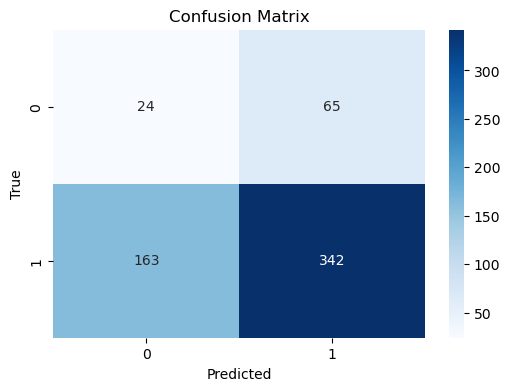

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example cross-tabulation data (replace this with your cross-tabulation data)
cross_tabulation = [[24, 65], [163, 342]]  # Example values for a 2x2 confusion matrix

# Plotting the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cross_tabulation, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [13]:
correlation_matrix = dataset.corr()

/var/folders/21/fhb_9hnn3b93rb0_82v9rwxm0000gp/T/ipykernel_837/1823223475.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


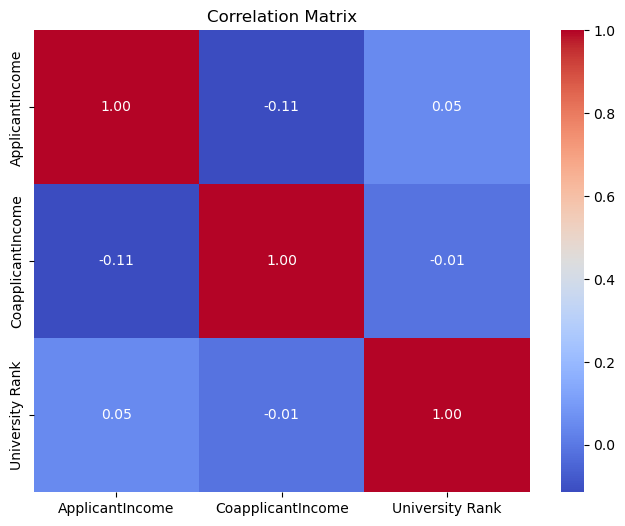

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming correlation_matrix is your computed correlation matrix
# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [15]:
# Checking null values if there are any

dataset.isnull().sum()

Applicant_ID         20
Gender               33
Married              23
Dependents           34
Education            20
Self_Employed        50
ApplicantIncome      20
CoapplicantIncome    20
University Rank       0
Visa_Status          20
Top University        0
dtype: int64

In [16]:
# Doing some data cleaning such as handling missing values, removing Nan values, conversion of strings etc
# Handling the missing values by filling it up with values

dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace = True)
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace = True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace = True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace = True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace = True)
dataset['Applicant_ID'].fillna(dataset['Applicant_ID'].mode()[0],inplace = True)
dataset['Education'].fillna(dataset['Education'].mode()[0],inplace = True)
dataset['ApplicantIncome'].fillna(dataset['ApplicantIncome'].mode()[0],inplace = True)
dataset['CoapplicantIncome'].fillna(dataset['CoapplicantIncome'].mode()[0],inplace = True)
dataset['Visa_Status'].fillna(dataset['Visa_Status'].mode()[0],inplace = True)

In [17]:
# Checking second time to find if there are any null values 

dataset.isnull().sum()

Applicant_ID         0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
University Rank      0
Visa_Status          0
Top University       0
dtype: int64

In [19]:
# Normalizing the columns Applicant Income and Co-Applicant Income
# Adding both incomes and creating a new column and applying a log to normalizing it

dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['TotalIncome_log'] = np.log(dataset['TotalIncome'])

In [20]:
# Replacing NaN with 0 or any other desired value
dataset.fillna(value=4.5, inplace=True)

In [21]:
# Exploring dataset to check how it looks after performing data cleaning
dataset.head()

,Applicant_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,University Rank,Visa_Status,Top University,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,521,Y,Y,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,416,N,Y,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,322,Y,Y,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,293,Y,Y,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,602,Y,Y,6000.0,8.699515


In [23]:
# Divide the dataset into dependent and independent variable 

x = dataset.iloc[:,np.r_[1:5,6:8,11:13]].values
y = dataset.iloc[:,9].values

In [24]:
# Exploring 'x' variable
x

array([['Male', 'No', '0', ..., 0.0, 5849.0, 8.674025985443025],
       ['Male', 'Yes', '1', ..., 1508.0, 6091.0, 8.714567550836485],
       ['Male', 'Yes', '0', ..., 0.0, 3000.0, 8.006367567650246],
       ...,
       ['Male', 'Yes', '0', ..., 0.0, 2500.0, 7.824046010856292],
       ['Male', 'Yes', '0', ..., 0.0, 2500.0, 7.824046010856292],
       ['Male', 'Yes', '0', ..., 0.0, 2500.0, 7.824046010856292]],
      dtype=object)

In [25]:
# Exploring 'y' variable
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [26]:
# Split the dataset into train and test dataset

# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

# x_train and x_test have independent variables
# y_train and y_test have dependent variables
# Spilitting it in the ration of 80:20, 80% of traning and 20% of traiing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [27]:
# Explorin x_train
print(x_train)

[['Male' 'Yes' '0' ... 2900.0 5858.0 8.675563527387679]
 ['Male' 'No' '1' ... 0.0 11250.0 9.328123407632566]
 ['Male' 'Yes' '0' ... 1733.0 5681.0 8.644882552557126]
 ...
 ['Male' 'Yes' '3+' ... 3167.0 8334.0 9.0280988119824]
 ['Male' 'Yes' '0' ... 0.0 6033.0 8.704999678440762]
 ['Female' 'Yes' '0' ... 2306.0 6486.0 8.777401286867264]]


In [28]:
# Converting categorical text into numeric format using label encoder for system to udnerstand
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

# Converting 'x_train' into numerical values
for i in range(0,5):
    x_train[:,i] = labelencoder_x.fit_transform(x_train[:,i])
    x_train[:,7] = labelencoder_x.fit_transform(x_train[:,7])   

In [29]:
# Exploring 'x' train after converting
x_train

array([[1, 1, 0, ..., 2900.0, 5858.0, 261],
       [1, 0, 1, ..., 0.0, 11250.0, 395],
       [1, 1, 0, ..., 1733.0, 5681.0, 245],
       ...,
       [1, 1, 3, ..., 3167.0, 8334.0, 352],
       [1, 1, 0, ..., 0.0, 6033.0, 266],
       [0, 1, 0, ..., 2306.0, 6486.0, 293]], dtype=object)

In [30]:
# Converting 'y_train' into numerical values
labelencoder_y = LabelEncoder()
labelencoder_y
y_train = labelencoder_y.fit_transform(y_train)

In [31]:
# Exploring 'y' train after converting
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [32]:
# Converting 'x_test' into numerical values

for i in range(0,5):
    x_test[:,i] = labelencoder_x.fit_transform(x_test[:,i])
    x_test[:,7] = labelencoder_x.fit_transform(x_test[:,7])

In [33]:
# Exploring 'x_test' after converting
x_test

array([[1, 0, 0, 0, 93, 0.0, 7085.0, 82],
       [0, 0, 0, 0, 65, 0.0, 4230.0, 27],
       [1, 1, 0, 0, 85, 3906.0, 10039.0, 100],
       [1, 1, 0, 0, 67, 2451.0, 6784.0, 77],
       [1, 1, 2, 0, 31, 1167.0, 3875.0, 21],
       [1, 1, 0, 1, 27, 3449.0, 6058.0, 67],
       [1, 1, 3, 0, 90, 0.0, 6417.0, 74],
       [1, 0, 0, 0, 103, 0.0, 12876.0, 110],
       [1, 0, 0, 0, 77, 0.0, 5124.0, 52],
       [1, 1, 0, 0, 10, 3150.0, 5233.0, 54],
       [0, 0, 0, 0, 35, 0.0, 2917.0, 3],
       [1, 1, 1, 0, 34, 0.0, 2895.0, 2],
       [0, 0, 0, 0, 96, 0.0, 8333.0, 92],
       [1, 1, 2, 0, 76, 3667.0, 8667.0, 93],
       [1, 1, 0, 0, 105, 0.0, 14880.0, 113],
       [1, 1, 1, 0, 60, 0.0, 3875.0, 21],
       [1, 0, 1, 1, 32, 1542.0, 4311.0, 31],
       [1, 0, 0, 1, 15, 1600.0, 3946.0, 24],
       [0, 0, 0, 0, 23, 0.0, 2500.0, 1],
       [1, 1, 0, 1, 20, 2333.0, 4787.0, 43],
       [0, 1, 0, 0, 28, 3440.0, 6085.0, 68],
       [1, 1, 0, 0, 19, 2340.0, 4765.0, 42],
       [1, 1, 2, 0, 87, 1300.0, 7550.0

In [34]:
# Converting 'y_test' into numerical values
labelencoder_y = LabelEncoder()
labelencoder_y
y_test = labelencoder_y.fit_transform(y_test)

In [35]:
# Exploring 'y_test' after converting
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [36]:
# Now scale the dataset 

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

# ------------Completed Pre-processing of Data------------

# ------------Start applying algorithms on a dataset------------

In [73]:
# Importing the Decision Tree Classifier library
from sklearn.tree import DecisionTreeClassifier

# Intializing the Decision Tree Classifier
DTClassifier = DecisionTreeClassifier(criterion='entropy',random_state=0)

# Providing training dataset to alogorithm
DTClassifier.fit(x_train,y_train)

# Use the Decision Tree Classifier algorithm to predit the values of test dataset
y_pred = DTClassifier.predict(x_test)
y_pred

# Testing the accuracy of prediction by finding its accuracy
# Importing metrics library to check the accuracy of prediction
from sklearn import metrics

# Printing the accuracy of Decision Tree Classifier prediction
print('The Accurcy of decision tree is:',metrics.accuracy_score(y_pred,y_test))

The Accurcy of decision tree is: 0.4959349593495935


In [38]:
# Use the Decision Tree Classifier algorithm to predit the values of test dataset
y_pred = DTClassifier.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [41]:
# Testing the accuracy of prediction by finding its accuracy
# Importing metrics library to check the accuracy of prediction
from sklearn import metrics

# Printing the accuracy of Decision Tree Classifier prediction
print('The Accurcy of decision tree is:',metrics.accuracy_score(y_pred,y_test))

The Accurcy of decision tree is: 0.4959349593495935


In [42]:
# Importing Naive Bayes and intializing it
from sklearn.naive_bayes import GaussianNB


NBClassifier = GaussianNB()
NBClassifier.fit(x_train,y_train)

GaussianNB()

In [43]:
# Use the Naive Bayes to predict the values of test dataset
y_pred = NBClassifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [77]:
# Printing the accuracy of Naive Bayes prediction
print('The Accurcy of Naive Bayes is:',metrics.accuracy_score(y_pred,y_test))

The Accurcy of Naive Bayes is: 0.4959349593495935


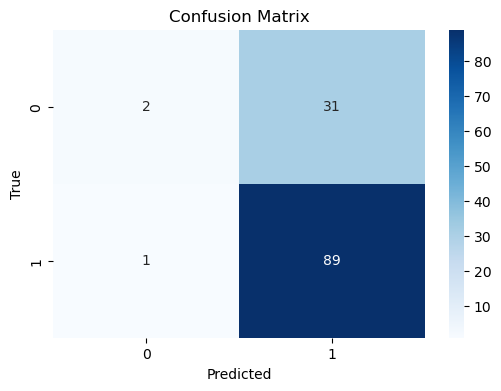

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true and predicted labels
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [82]:
# # Importing Logestic Regression and intializing it
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()

In [83]:
# Train the model on the training data
logistic_reg.fit(x_train, y_train)

LogisticRegression()

In [89]:
# Predict on the test data
y_predLR = logistic_reg.predict(x_test)

In [90]:
y_predLR

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [91]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print('The Accurcy of Logistic Regression is:',metrics.accuracy_score(y_pred,y_test))

The Accurcy of Logistic Regression is: 0.7398373983739838


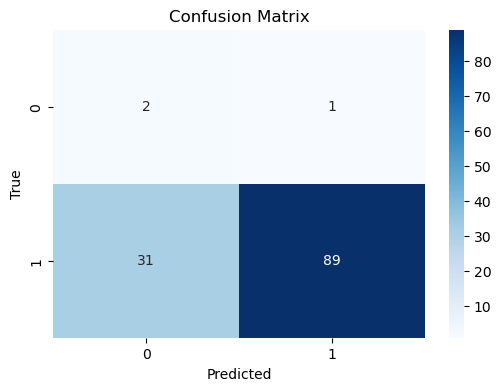

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true and predicted labels
# Create a confusion matrix
conf_matrix = confusion_matrix(y_pred, y_test)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [55]:
dataset

,Applicant_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,University Rank,Visa_Status,Top University,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,205,Y,Y,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,79,N,N,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,285,Y,Y,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,161,Y,Y,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,313,Y,Y,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP001002,Male,Yes,0,Graduate,No,2500.0,0.0,14,Y,N,2500.0,7.824046
610,LP001002,Male,Yes,0,Graduate,No,2500.0,0.0,126,Y,Y,2500.0,7.824046
611,LP001002,Male,Yes,0,Graduate,No,2500.0,0.0,253,Y,Y,2500.0,7.824046
612,LP001002,Male,Yes,0,Graduate,No,2500.0,0.0,268,Y,Y,2500.0,7.824046


In [451]:
#Objectives

#1 Predecting the no of visa approvals
#2 Application analysis based on top university ranking
#3 

In [452]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


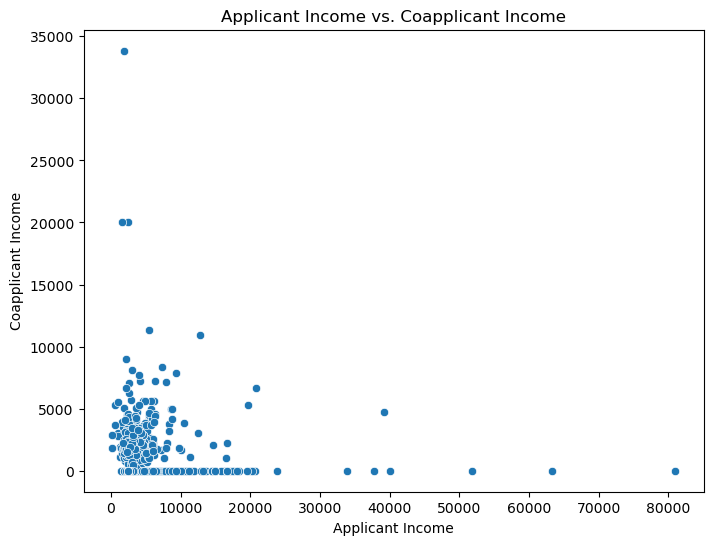

In [56]:
# Scatterplot of ApplicantIncome vs. CoapplicantIncome
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ApplicantIncome', y='CoapplicantIncome', data=dataset)
plt.title('Applicant Income vs. Coapplicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Coapplicant Income')
plt.show()

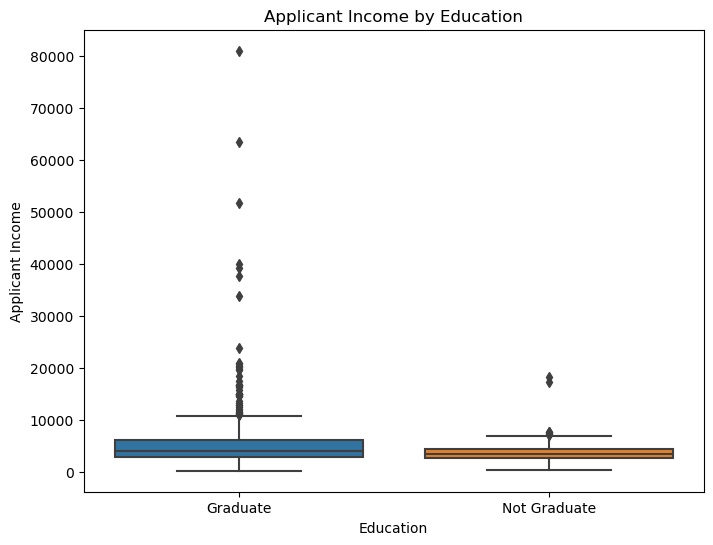

In [57]:
# Boxplot of ApplicantIncome by Education
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education', y='ApplicantIncome', data=dataset)
plt.title('Applicant Income by Education')
plt.xlabel('Education')
plt.ylabel('Applicant Income')
plt.show()

Text(0.5, 1.0, 'Total Number of Applicants')

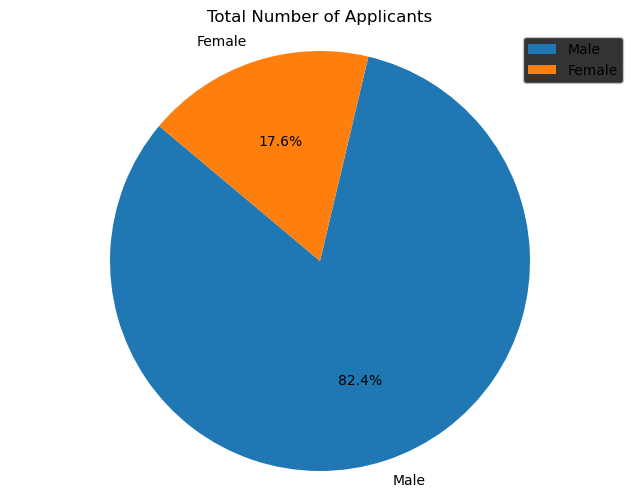

In [51]:
# Count the occurrences of each gender
gender_counts = dataset['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.legend() # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total Number of Applicants')

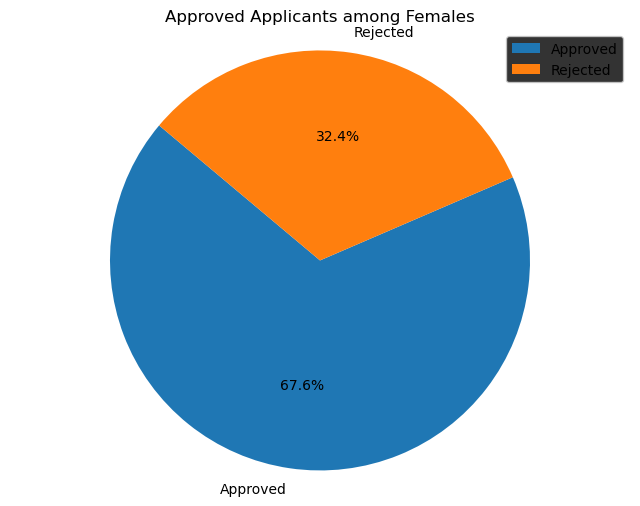

In [50]:
# Filter dataset for females
female_applicants = dataset[dataset['Gender'] == 'Female']

# Count the occurrences of approval status among female applicants
approved_count_female = female_applicants[female_applicants['Visa_Status'] == 'Y'].shape[0]
rejected_count_female = female_applicants[female_applicants['Visa_Status'] == 'N'].shape[0]

# Create a pie chart for approved applicants among females
labels = ['Approved', 'Rejected']
sizes = [approved_count_female, rejected_count_female]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.legend()
plt.title('Approved Applicants among Females')

# Show the pie chart
plt.show()

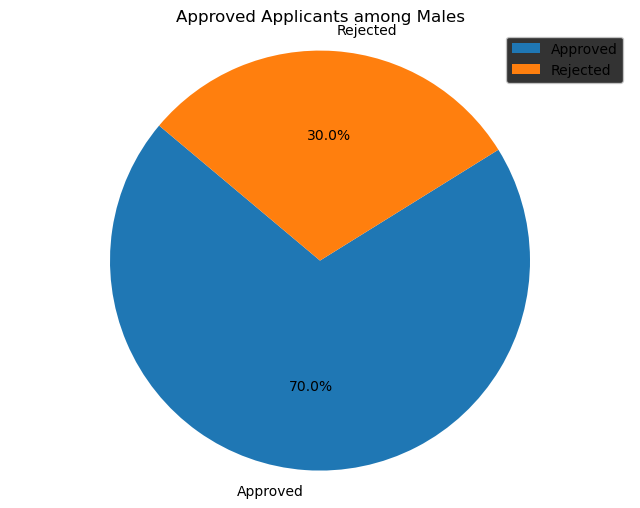

In [94]:
# Filter dataset for females
male_applicants = dataset[dataset['Gender'] == 'Male']

# Count the occurrences of approval status among female applicants
approved_count_male = male_applicants[male_applicants['Visa_Status'] == 'Y'].shape[0]
rejected_count_male = male_applicants[male_applicants['Visa_Status'] == 'N'].shape[0]

# Create a pie chart for approved applicants among females
labels = ['Approved', 'Rejected']
sizes = [approved_count_male, rejected_count_male]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.legend()
plt.title('Approved Applicants among Males')

# Show the pie chart
plt.show()